# Profiling du dataset *Carte des loyers*

Dans ce notebook on évalue l'exploitabilité du jeu de données *Carte des loyers - Indicateurs de loyers d'annonce par commune en 2018* (https://www.data.gouv.fr/fr/datasets/carte-des-loyers-indicateurs-de-loyers-dannonce-par-commune-en-2018/#_) par des algorithmes de Machine Learning. On s'intéressera ici aux loyer des *appartements*.

In [1]:
import pandas as pd
import pandas_profiling
from pandas_profiling import ProfileReport
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Import du dataset

In [2]:
url = 'https://www.data.gouv.fr/fr/datasets/r/8fac6fb7-cd07-4747-8e0b-b101c476f0da'
data_loyers = pd.read_csv(url, encoding='latin-1',sep=';')

## Profiling du dataset

In [3]:
profile_loyers = data_loyers.profile_report()
profile_loyers.to_file("8fac6fb7-cd07-4747-8e0b-b101c476f0da.html")

/home/giulia/anaconda3/lib/python3.8/site-packages/scipy/cluster/hierarchy.py:2837: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  ax.set_ylim([dvw, 0])


**Histogramme et distribution de chaque variable**

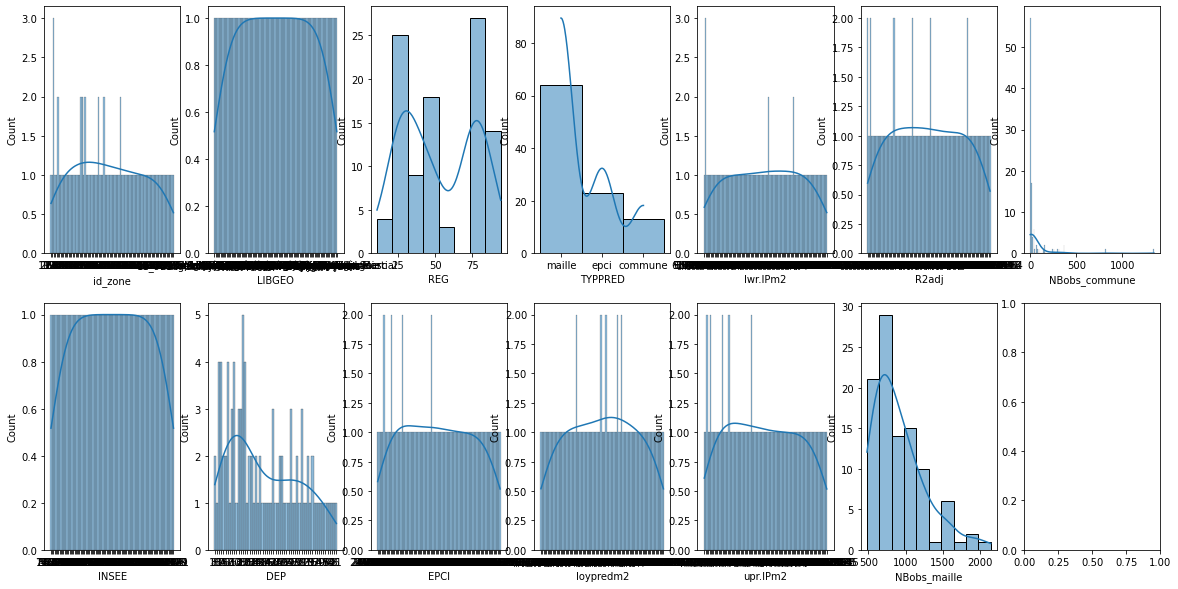

In [9]:
n_rows = 2
n_cols = 7
fig, axs = plt.subplots(n_rows,n_cols,figsize=(20,10))
for i,col in enumerate(data_loyers.columns):
  sns.histplot(data_loyers.sample(100), x=col, kde=True, ax=axs[i%n_rows,i//n_rows])

# Analyse de l'exploitabilité du datset

- la taille du dataset est adaptée pour faire du Machine Learning (nombre de lignes de l'ordre de $10^{4}$ et 13 colonnes)
- 6 variables numériques et 7 catégorielles (attention à la mauavaise détéction du type de variables par Pandas Profiling); deux variables catégorielles (*reg* et *typepred*) avec des classes plutôt déséquilibrées
- peu de valeurs manquantes

Ce dataset est exploitable par des algorithmes de Machine Learning par exemple pour faire de la prévision du prix d'un loyer dans une ville française.